# Laboratorio 02: Representación Numérica, Errores y Estabilidad.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Jose Nicolas Rodriguez Montoya
*Métodos computacionales 2025-I*

---

# 1.
Cree una función llamada `myint` pero que a partir de un número binario con base de 16 bits encuentre el entero correspondiente. Compare su resultado con `int(0b1000011100001)`

In [1]:
def myint(bin_str):
    """
    Convierte un número binario de 16 bits a su entero correspondiente.

    Parámetros:
    bin_str (str): Cadena binaria con formato '0bxxxx' o 'xxxx' (hasta 16 bits)

    Retorna:
    int: El valor entero correspondiente
    """
    # Eliminamos el prefijo '0b' si está presente
    if bin_str.startswith('0b'):
        bin_str = bin_str[2:]

    # Aseguramos que la longitud sea de 16 bits (rellenamos con ceros a la izquierda)
    bin_str = bin_str.zfill(16)


    # Convertir a entero
    decimal = 0
    for i, bit in enumerate(reversed(bin_str)):
        decimal += int(bit) * (2 ** i)

    return decimal


numero_binario = '0b1000011100001'
resultado_myint = myint(numero_binario)
resultado_int = int(numero_binario, 2)

print(f"Resultado de myint: {resultado_myint}")
print(f"Resultado de int(): {resultado_int}")


Resultado de myint: 4321
Resultado de int(): 4321
¿Los resultados son iguales? True


# 2.
Generar una función llamada `number64` para flotantes de precisión doble (64bits) donde a partir de un número binario encuentre el valor real. Compruebe su solución usando

```
number64("0100000000111011100100001111111111111111111111111111111111111111")
```

In [3]:
def number64(bin_str):
    if bin_str.startswith('0b'):
        bin_str = bin_str[2:]

    if len(bin_str) != 64:
        raise ValueError("La cadena binaria debe tener exactamente 64 bits")

    # Extraer componentes
    sign_bit = int(bin_str[0])
    exponent_bits = bin_str[1:12]
    mantissa_bits = bin_str[12:]

    # Calcular signo
    sign = (-1) ** sign_bit

    # Calcular exponente
    exponent = int(exponent_bits, 2)
    bias = 1023
    true_exponent = exponent - bias

    # Calcular mantisa
    mantissa = 1.0  # Implícito leading 1 para números normales
    for i, bit in enumerate(mantissa_bits, 1):
        mantissa += int(bit) * (2 ** -i)

    # Casos especiales
    if exponent == 0:
        if mantissa == 1.0:
            return 0.0 * sign  # Cero
        else:
            # Subnormal
            mantissa -= 1.0
            true_exponent = -1022
    elif exponent == 0b11111111111:
        if mantissa == 1.0:
            return float('inf') * sign
        else:
            return float('nan')

    # Calcular valor final
    return sign * (2 ** true_exponent) * mantissa

binary_try = "0100000000111011100100001111111111111111111111111111111111111111"

print("Implementación manual:", number64(binary_try))


Implementación manual: 27.566406249999996


# 3. Aproximación de $\pi$

La serie de Maclaurin para la función tangente inversa converge en $-1 < x \leq 1$ y está dada por:

$$
\arctan x = \lim_{n \to \infty} P_n(x) = \lim_{n \to \infty} \sum_{i=1}^n (-1)^{i+1} \frac{x^{2i-1}}{2i-1}
$$

- **Aproximación básica**
    - Utilizando el hecho de que $\tan(\pi/4) = 1$, implemente en Python una función que calcule $4P_n(1)$ y determina el número mínimo de términos $n$ necesarios para que $|4P_n(1) - \pi| < 10^{-3}$. Compare su resultado con el valor de $\pi$ de la librería math.
    - Requiriendo que el valor de $\pi$ esté dentro de un error de $10^{-4}$. ¿Cuántos términos de la serie se necesitaría sumar para obtener esta precisión? Implemente una solución en Python para encontrar este valor.
- **Mejora de la convergencia**
    El método anterior puede mejorarse significativamente usando la identidad:
    $$
    \frac{\pi}{4} = \arctan\left(\frac{1}{2}\right) + \arctan\left(\frac{1}{3}\right)
    $$
    - Implemente en Python una función que evalúe la serie para $\arctan(1/2)$ y $\arctan(1/3)$ por separado y luego las sume. Determine el número mínimo de términos necesarios para cada serie (pueden ser diferentes) para aproximar $\pi$ con un error menor a $10^{-3}$ y $10^{-6}$.

- **Método de alta precisión**
    Para obtener una convergencia aún más rápida, usamos la identidad:
    $$
    \frac{\pi}{4} = 4\arctan\left(\frac{1}{5}\right) - \arctan\left(\frac{1}{239}\right)
    $$
    Desarrolle un programa en Python que implemente esta fórmula y determine:
    - El número mínimo de términos necesarios en cada serie para aproximar $\pi$ con error menor a $10^{-3}$ y $10^{-6}$.
    - Compare el rendimiento (número de términos requeridos) con los métodos anteriores.



In [17]:
import math
import numpy as np
def aproximacion_basica (x, tol, maxiter):
  valor_pi = 0
  n = 0
  for i in range(1, maxiter+1):  #recorremos de 1 hasta nuetro termino de interes
    valor_pi += ((-1)**(i+1))*(x**(2*i-1)/(2*i-1)) # actualizamos el valor de pi al termino calculado
    if abs(4*valor_pi - math.pi) < tol:  #evaluamos nuestro criterio de convergencia
      return i, 4 * valor_pi

  raise(RuntimeError("No se alcanzó la convergencia"))


print(aproximacion_basica(1, 10**(-3), 10000))

print(aproximacion_basica(1, 10**(-4), 10000))



(1000, 3.140592653839794)
(10000, 3.1414926535900345)


In [43]:

#Mejora de convergencia
def aux_function(x, tol, maxiter):
    valor = 0
    termino_anterior = 0
    for i in range(1, maxiter+1):
      termino =((-1)**(i+1)) * (x**((2*i)-1))/((2*i)-1)
      valor += termino
      if abs( termino) < tol:
        return i, valor
      termino_anterior = termino
    raise(RuntimeError("No se alcanzó la convergencia"))

pi = 4*(((aux_function(1/2, 10**(-3), 10000))[1]) + ((aux_function(1/3, 10**(-3), 10000))[1]))
print(pi)

print(f'para una tolerancia de 1e-3 la cantidad de terminos necesarios fue respectivamente para 1/2 y 1/3 de {aux_function(1/2, 10**(-3), 10000)[0]} y {aux_function(1/3, 10**(-3), 10000)[0]} terminos')


print(f'para una tolerancia de 1e-6 la cantidad de terminos necesarios fue respectivamente para 1/2 y 1/3 de {aux_function(1/2, 10**(-6), 10000)[0]} y {aux_function(1/3, 10**(-6), 10000)[0]} terminos')



3.1419799015285124
para una tolerancia de 1e-3 la cantidad de terminos necesarios fue respectivamente para 1/2 y 1/3 de 5 y 3 terminos
para una tolerancia de 1e-6 la cantidad de terminos necesarios fue respectivamente para 1/2 y 1/3 de 9 y 6 terminos


In [47]:
# MEtodo de alta precision
pi = 4*(4*((aux_function(1/5, 10**(-3), 10000))[1]) - ((aux_function(1/239, 10**(-3), 10000))[1]))
print(pi)

print(f'para una tolerancia de 1e-3 la cantidad de terminos necesarios fue respectivamente para 1/5 y 1/239 de {aux_function(1/5, 10**(-3), 10000)[0]} y {aux_function(1/239, 10**(-3), 10000)[0]} terminos')
print(f'para una tolerancia de 1e-6 la cantidad de terminos necesarios fue respectivamente para 1/2 y 1/3 de {aux_function(1/5, 10**(-6), 10000)[0]} y {aux_function(1/239, 10**(-6), 10000)[0]} terminos')



3.1416210293260605
para una tolerancia de 1e-3 la cantidad de terminos necesarios fue respectivamente para 1/5 y 1/239 de 3 y 2 terminos
para una tolerancia de 1e-6 la cantidad de terminos necesarios fue respectivamente para 1/2 y 1/3 de 5 y 2 terminos


# 4. Serie Exponencial
Considere la serie para $e^{-x}$

$$
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
$$

- Calcula la serie para $x \le 1$ y compárela con la función incorporada `np.exp(x)` (asuma que la función exponencial incorporada es exacta). Elegir un $N$ para el cual el siguiente término en la serie no sea más que $10^{-7}$ de la suma hasta ese punto.

$$
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
$$

- Examine los términos de la serie para $x\approx 10$ y observa las cancelaciones sustractivas significativas que ocurren cuando términos grandes se suman para dar respuestas pequeñas. En particular, imprime la cancelación casi perfecta en $n \approx x − 1$.

- Compruebe si se obtiene una mejor precisión siendo ingenioso y usando $e^{−x} = \frac{1}{e^x}$ para valores grandes de $x$. Esto elimina la cancelación sustractiva, pero no elimina todos los errores de redondeo.


- Incrementando progresivamente $x$ de 1 a 10, y luego de 10 a 100, use el programa para determinar experimentalmente cuándo la serie comienza a perder precisión, y cuándo la serie ya no converge.


- Realice una serie de gráficos del error versus $N$ para diferentes valores de $x$.

e^(-0.5) = 0.6065306594552606 (N=9) vs exacto=0.6065306597126334

Análisis de cancelación para x = 10:
n ≈ x-1 (9): término = -2755.731922398589
Suma acumulada hasta n=9: -1413.1446208112875


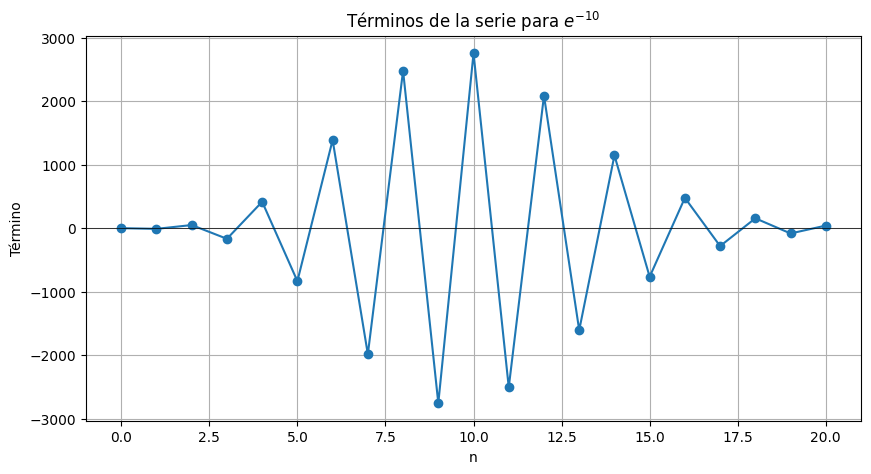

x=1.0: Serie (N=11) error=5.27e-09 
x=2.0: Serie (N=16) error=2.45e-09 | Alternativo error=0.00e+00
x=3.0: Serie (N=20) error=3.62e-09 | Alternativo error=0.00e+00
x=4.0: Serie (N=24) error=3.43e-09 | Alternativo error=1.89e-16
x=5.0: Serie (N=28) error=2.68e-09 | Alternativo error=0.00e+00
x=6.0: Serie (N=31) error=1.03e-08 | Alternativo error=0.00e+00
x=7.0: Serie (N=35) error=6.56e-09 | Alternativo error=0.00e+00
x=8.0: Serie (N=39) error=4.21e-09 | Alternativo error=0.00e+00
x=9.0: Serie (N=42) error=1.14e-08 | Alternativo error=2.20e-16
x=10.0: Serie (N=46) error=2.00e-10 | Alternativo error=1.49e-16


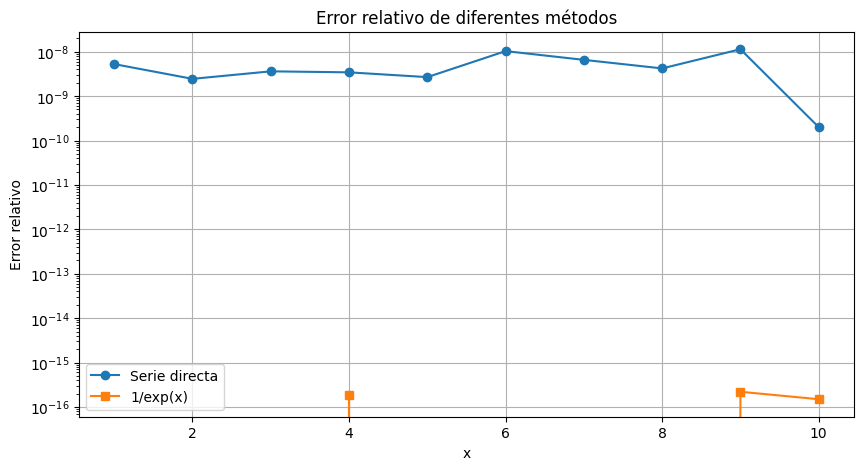

x=10.0: Serie (N=46) error=2.00e-10 | Alternativo error=1.49e-16
x=20.0: Serie (N=82) error=3.65e-01 | Alternativo error=0.00e+00
x=30.0: Serie (N=102) error=6.43e+08 | Alternativo error=1.35e-16
x=40.0: Serie (N=120) error=1.38e+18 | Alternativo error=0.00e+00
x=50.0: Serie (N=138) error=2.57e+26 | Alternativo error=1.22e-16
x=60.0: Serie (N=156) error=6.37e+34 | Alternativo error=0.00e+00
x=70.0: Serie (N=168) error=inf | Alternativo error=0.00e+00
x=80.0: Serie (N=162) error=inf | Alternativo error=0.00e+00
x=90.0: Serie (N=158) error=inf | Alternativo error=0.00e+00
x=100.0: Serie (N=155) error=inf | Alternativo error=1.34e-16


<ipython-input-48-aa2d03876f8a>:27: RuntimeWarning: overflow encountered in scalar power
  term = ((-1)**n) * (x**n) / factorial(n)


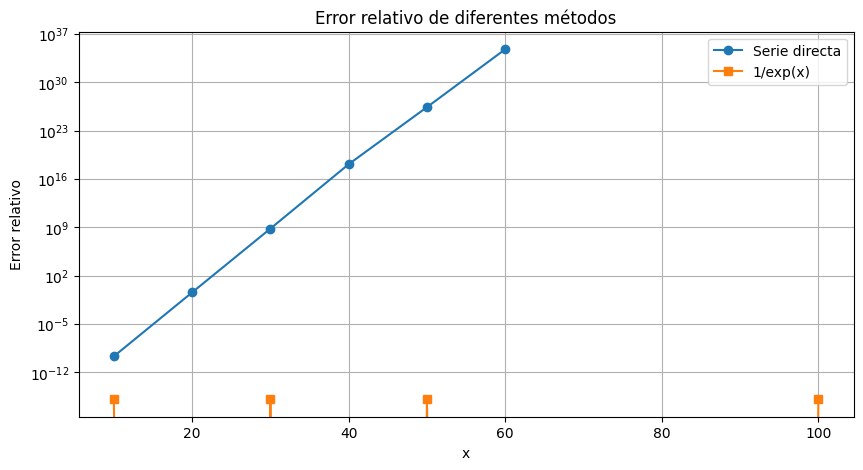

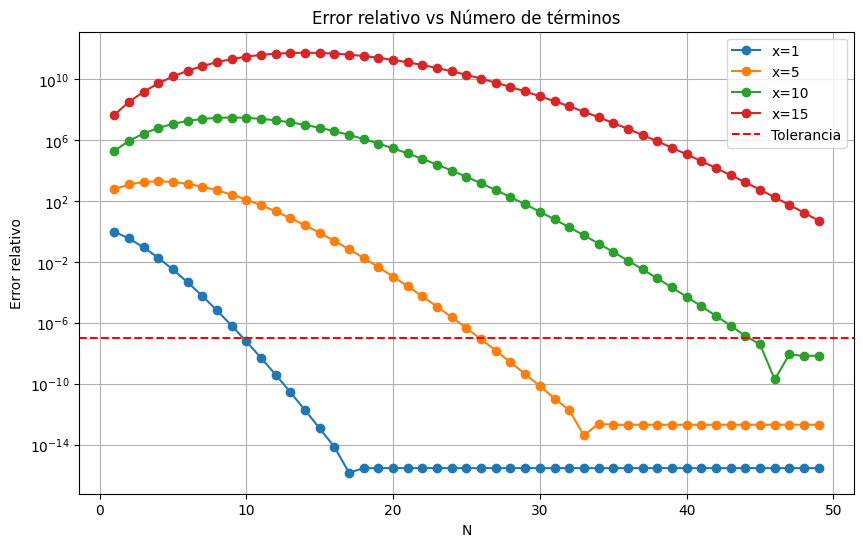

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

def serie_exponencial(x, N=None, tol=1e-7):
    """
    Calcula e^{-x} usando desarrollo en serie con criterio de convergencia

    Parámetros:
    x: valor de entrada
    N: número máximo de términos (si None, se calcula automáticamente)
    tol: tolerancia para el criterio de convergencia

    Retorna:
    (suma, N_used, terms) donde:
    - suma: valor aproximado
    - N_used: número de términos usados
    - terms: lista de términos de la serie
    """
    suma = 0.0
    terms = []

    if N is None:
        # Cálculo automático de N basado en la tolerancia
        n = 0
        while True:
            term = ((-1)**n) * (x**n) / factorial(n)
            terms.append(term)
            suma += term

            # Criterio de convergencia
            if n > 0 and abs(term) <= tol * abs(suma):
                return suma, n, terms

            n += 1
            if n > 1000:  # Límite de seguridad
                return suma, n, terms
    else:
        # Usar N fijo
        for n in range(N+1):
            term = ((-1)**n) * (x**n) / factorial(n)
            terms.append(term)
            suma += term
        return suma, N, terms

def analizar_cancelacion(x):
    """Analiza los términos de la serie para x≈10"""
    _, _, terms = serie_exponencial(x, N=int(x*2))

    print(f"\nAnálisis de cancelación para x = {x}:")
    print(f"n ≈ x-1 ({round(x-1)}): término = {terms[round(x-1)]}")
    print(f"Suma acumulada hasta n={round(x-1)}: {sum(terms[:round(x-1)+1])}")

    # Gráfico de términos
    plt.figure(figsize=(10, 5))
    plt.plot(range(len(terms)), terms, 'o-')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.title(f'Términos de la serie para $e^{{-{x}}}$')
    plt.xlabel('n')
    plt.ylabel('Término')
    plt.grid(True)
    plt.show()

def comparar_metodos(x_values):
    """Compara diferentes métodos para calcular e^{-x}"""
    errors_serie = []
    errors_alternativo = []

    for x in x_values:
        # Método directo
        approx, n, _ = serie_exponencial(x)
        exact = np.exp(-x)
        error_serie = abs(approx - exact)/exact

        # Método alternativo para x grandes
        if x > 1:
            alt_approx = 1/np.exp(x)
            error_alt = abs(alt_approx - exact)/exact
        else:
            alt_approx = np.nan
            error_alt = np.nan

        errors_serie.append(error_serie)
        errors_alternativo.append(error_alt)

        print(f"x={x:.1f}: Serie (N={n}) error={error_serie:.2e}", end=" ")
        if x > 1:
            print(f"| Alternativo error={error_alt:.2e}")
        else:
            print()

    # Gráfico de errores
    plt.figure(figsize=(10, 5))
    plt.semilogy(x_values, errors_serie, 'o-', label='Serie directa')
    if any(x > 1 for x in x_values):
        plt.semilogy(x_values, errors_alternativo, 's-', label='1/exp(x)')
    plt.title('Error relativo de diferentes métodos')
    plt.xlabel('x')
    plt.ylabel('Error relativo')
    plt.legend()
    plt.grid(True)
    plt.show()

# Parte 1: Calcular serie con criterio de convergencia
x = 0.5
approx, n, _ = serie_exponencial(x)
print(f"e^(-{x}) = {approx} (N={n}) vs exacto={np.exp(-x)}")

# Parte 2: Analizar cancelación para x≈10
analizar_cancelacion(10)

# Parte 3: Comparar métodos para diferentes x
x_values = np.linspace(1, 10, 10)
comparar_metodos(x_values)

# Parte 4: Analizar rango extendido
x_values_ext = np.linspace(10, 100, 10)
comparar_metodos(x_values_ext)

# Parte 5: Gráficos de error vs N para diferentes x
plt.figure(figsize=(10, 6))
for x in [1, 5, 10, 15]:
    errors = []
    N_values = range(1, 50)
    for N in N_values:
        approx, _, _ = serie_exponencial(x, N=N)
        exact = np.exp(-x)
        errors.append(abs(approx - exact)/exact)
    plt.plot(N_values, errors, 'o-', label=f'x={x}')

plt.axhline(1e-7, color='red', linestyle='--', label='Tolerancia')
plt.title('Error relativo vs Número de términos')
plt.xlabel('N')
plt.ylabel('Error relativo')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

# 5.

Supongamos que tenemos una función $f(x)$ y queremos calcular su derivada en un punto $x$. Podemos hacerlo manualmente si conocemos la forma matemática de la función, o podemos hacerlo computacionalmente usando la definición de derivada:

$$
\frac{df}{dx} = \lim_{\delta \to 0} \frac{f(x + \delta) - f(x)}{\delta}.
$$

En el computador no podemos tomar el límite cuando $\delta$ tiende a cero, pero podemos obtener una aproximación razonable usando valores pequeños de $\delta$.

- Escriba un programa que:
    - Defina una función $f(x)$ que retorne el valor $x(x-1)$
    - Calcule la derivada de la función en $x = 1$ usando la fórmula anterior con $\delta = 10^{-2}$
    - Compare este resultado con el valor exacto obtenido analíticamente
    
    Los resultados no coincidirán exactamente. ¿Por qué?
    
- Repita el cálculo para $\delta = 10^{-4}, 10^{-6}, 10^{-8}, 10^{-10}, 10^{-12}$, y $10^{-14}$. Observará que la precisión mejora inicialmente al disminuir $\delta$, pero luego empeora. Explique este comportamiento.


Derivada exacta en x=1: 1

delta		Aproximación	Error absoluto	Error relativo (%)
1e-02	1.0100000000	1.00e-02		1.00e+00%
1e-04	1.0001000000	1.00e-04		1.00e-02%
1e-06	1.0000009999	1.00e-06		1.00e-04%
1e-08	1.0000000039	3.92e-09		3.92e-07%
1e-10	1.0000000828	8.28e-08		8.28e-06%
1e-12	1.0000889006	8.89e-05		8.89e-03%
1e-14	0.9992007222	7.99e-04		7.99e-02%


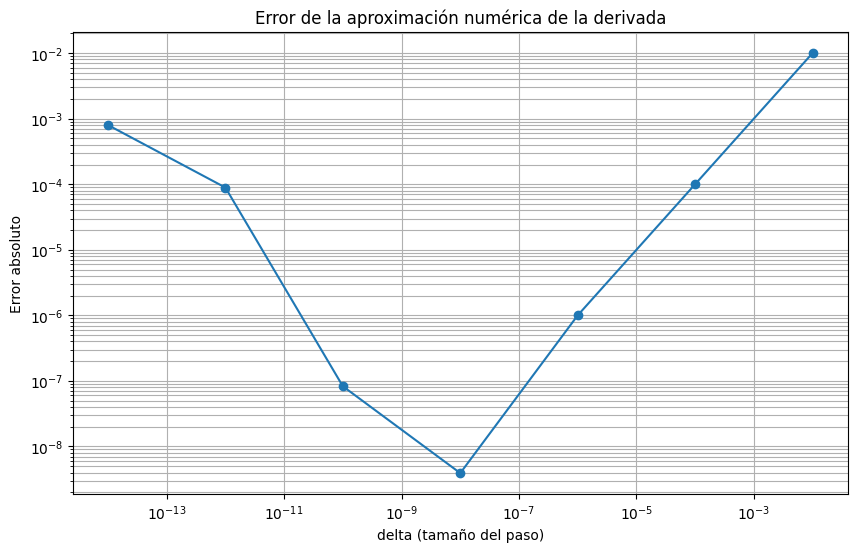

In [55]:
import numpy as np

def f(x):
    """Función a derivar: f(x) = x(x - 1)"""
    return x * (x - 1)

def derivada_exacta(x):
    """Derivada exacta de f(x) = x^2 - x"""
    return 2*x - 1

def derivada_numerica(f, x, delta):
    """Aproximación numérica de la derivada"""
    return (f(x + delta) - f(x)) / delta

# Punto donde calculamos la derivada
x = 1
valor_exacto = derivada_exacta(x)

# Diferentes valores de delta
deltas = [1e-2, 1e-4, 1e-6, 1e-8, 1e-10, 1e-12, 1e-14]

print(f"Derivada exacta en x={x}: {valor_exacto}\n")
print("delta\t\tAproximación\tError absoluto\tError relativo (%)")

errores = []
for delta in deltas:
    aprox = derivada_numerica(f, x, delta)
    error_abs = abs(aprox - valor_exacto)
    error_rel = error_abs / abs(valor_exacto) * 100
    errores.append(error_abs)
    print(f"{delta:.0e}\t{aprox:.10f}\t{error_abs:.2e}\t\t{error_rel:.2e}%")

# Gráfico del error vs delta
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.loglog(deltas, errores, 'o-')
plt.title('Error de la aproximación numérica de la derivada')
plt.xlabel('delta (tamaño del paso)')
plt.ylabel('Error absoluto')
plt.grid(True, which="both", ls="-")
plt.show()